# Final Exam - House Prices

Course: AP4063

Student Number: 109601003

Name: 林群賀

#### Baseline: 0.1333

## Import the package

In [48]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from zipfile import ZipFile

## Import the data sets.


In [49]:
data_path = os.getcwd()
train_data_path = data_path + '/data/house_train.csv.gz'
test_data_path = data_path + '/data/house_test.csv.gz'

df_train = pd.read_csv(train_data_path)
df_test = pd.read_csv(test_data_path)

In [50]:
y = df_train['SalePrice']
train_Y = np.log1p(df_train['SalePrice'])
ids = df_test['Id']
df_train = df_train.drop(['Id', 'SalePrice'] , axis=1)
df_test = df_test.drop(['Id'] , axis=1)

In [51]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [52]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [53]:
df_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


#### Check the missing values

<AxesSubplot: >

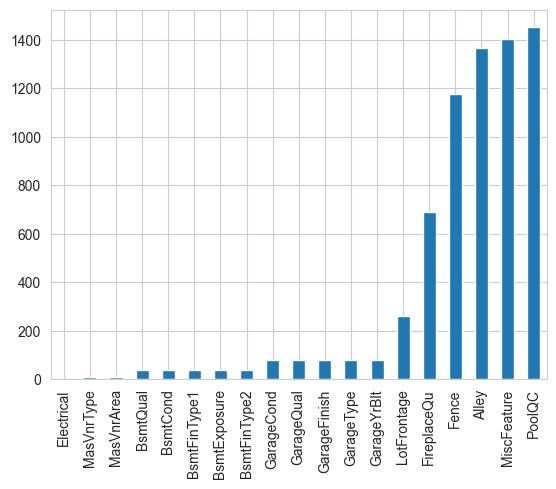

In [54]:
sns.set_style("whitegrid")
missing = df_train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

/var/folders/nl/l2b2vttd7j73mhvfwrp0lwzr0000gn/T/ipykernel_83751/2558657463.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=stats.johnsonsu)
/var/folders/nl/l2b2vttd7j73mhvfwrp0lwzr0000gn/T/ipykernel_83751/2558657463.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kd

<AxesSubplot: title={'center': 'Log Normal'}, xlabel='SalePrice'>

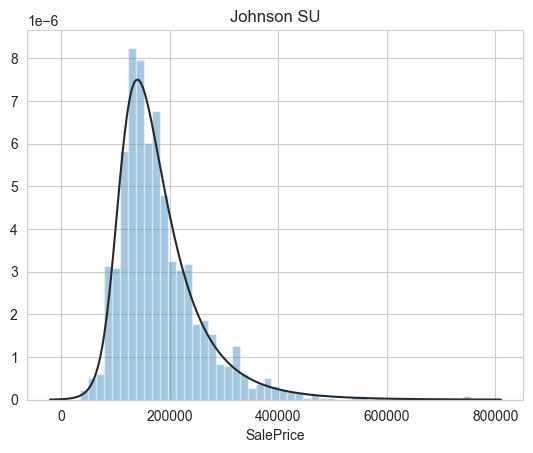

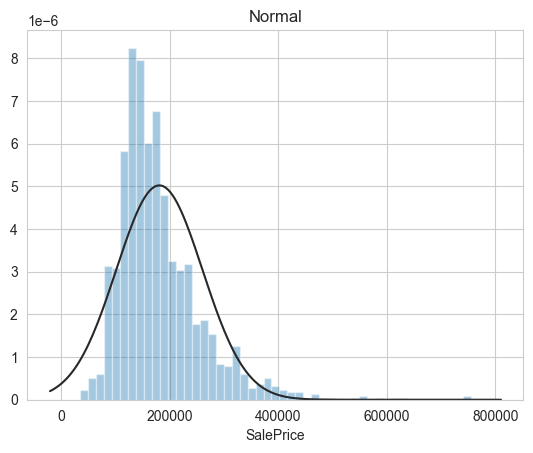

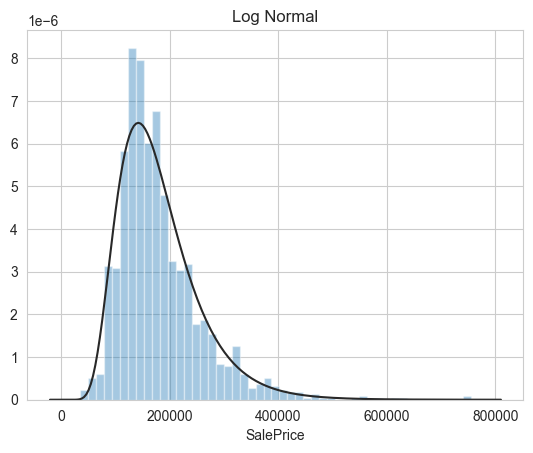

In [55]:
import scipy.stats as stats

plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=stats.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=stats.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=stats.lognorm)

In [56]:
df_train = df_train.drop(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'] , axis=1)
df_test = df_test.drop(['FireplaceQu', 'Fence', 'Alley', 'MiscFeature', 'PoolQC'] , axis=1)

df_train = df_train.fillna(df_train.mean()) 

/var/folders/nl/l2b2vttd7j73mhvfwrp0lwzr0000gn/T/ipykernel_83751/2388764994.py:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train = df_train.fillna(df_train.mean())


In [57]:
df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,40,0,0,0,0,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,60,0,0,0,0,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,112,0,0,0,0,4,2010,WD,Normal


#### If dropping a significant number of features, the presicion will get down to 0.14313

In [58]:
# df_train = pd.get_dummies(df_train)
# df_test = pd.get_dummies(df_test)

In [59]:
# df_train

In [60]:
# #Drop features that are correlated to each other

# covarianceMatrix = df_train.corr()
# listOfFeatures = [i for i in covarianceMatrix]
# setOfDroppedFeatures = set() 
# for i in range(len(listOfFeatures)) :
#     for j in range(i+1,len(listOfFeatures)): #Avoid repetitions 
#         feature1=listOfFeatures[i]
#         feature2=listOfFeatures[j]
#         if abs(covarianceMatrix[feature1][feature2]) > 0.8: #If the correlation between the features is > 0.8
#             setOfDroppedFeatures.add(feature1) #Add one of them to the set
# #I tried different values of threshold and 0.8 was the one that gave the best results

# df_train = df_train.drop(setOfDroppedFeatures, axis=1)
# # df_test = df_train.drop(setOfDroppedFeatures, axis=1)

In [61]:
# #Drop features that are not correlated with output

# nonCorrelatedWithOutput = [column for column in df_train if abs(y.corr(y)) < 0.045]
# #I tried different values of threshold and 0.045 was the one that gave the best results

# df_train = df_train.drop(nonCorrelatedWithOutput, axis=1)

In [62]:
# df_train

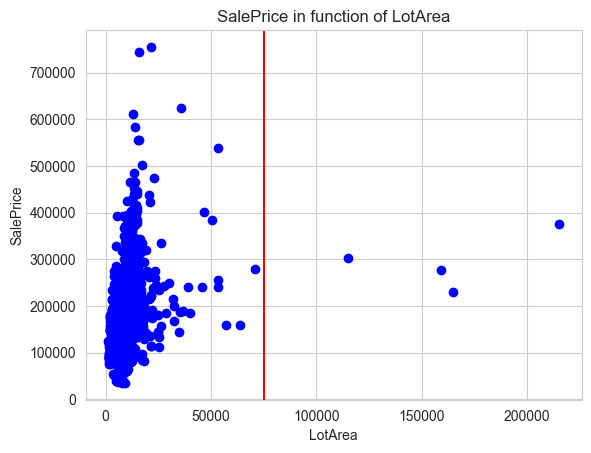

In [63]:
plt.plot(df_train['LotArea'], y, 'bo')
plt.axvline(x=75_000, color='r')
plt.ylabel('SalePrice')
plt.xlabel('LotArea')
plt.title('SalePrice in function of LotArea')

plt.show()

In [64]:
df = pd.concat([df_train,df_test])

In [65]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

LEncoder = LabelEncoder()
MMEncoder = MinMaxScaler()

for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(df[c]) 
    else:
        df[c] = df[c].fillna(-1)
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.235294,0.8,0.210191,0.033420,1.0,1.0,1.0,0.0,1.0,0.0,...,0.082210,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,1.0,0.8
1,0.000000,0.8,0.257962,0.038795,1.0,1.0,1.0,0.0,0.5,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,1.0,0.8
2,0.235294,0.8,0.219745,0.046507,1.0,0.0,1.0,0.0,1.0,0.0,...,0.056604,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,1.0,0.8
3,0.294118,0.8,0.194268,0.038561,1.0,0.0,1.0,0.0,0.0,0.0,...,0.047170,0.268775,0.0,0.0,0.0,0.0,0.090909,0.00,1.0,0.0
4,0.235294,0.8,0.270701,0.060576,1.0,0.0,1.0,0.0,0.5,0.0,...,0.113208,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,1.0,0.8


## Prediction

#### With the Gradient Boosting Machine Model

In [66]:
train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()
reg.fit(train_X, train_Y)
pred = reg.predict(test_X)

## Output the Results

In [67]:
data_path = os.getcwd()
data_path += "/data/my_result/"

pred = np.expm1(pred)
sub = pd.DataFrame({'Id': ids, 'SalePrice': pred})
sub.to_csv(data_path + 'house_1111_finalexam.csv', index=False) 

## My Result

#### The screenshot

![the result](./data/my_result/house_1111_finalexam.png)

## What I have tried?

1. 
   I first examined the data, but found that there were a lot of variables. 
   
   Additionally, I discovered that there were many pieces of data that could not be used. 
   
   As a result, I referred to the approach used in this "#1 House Prices Solution [top 1%]" and replaced the data. However, when I continued to implement it, I found that the accuracy decreased. 
   
   Also, I did not understand the author's approach very well, so I decided not to use it.

## Reference

[#1 House Prices Solution [top 1%]](https://www.kaggle.com/code/jesucristo/1-house-prices-solution-top-1#Submission)

[House Prices Complete Solution with Guidance](https://www.kaggle.com/code/marweni/house-prices-complete-solution-with-guidance)